In [10]:
from nn4cast.predefined_classes import Dictionary_saver,Preprocess,Model_build_and_test,Model_searcher,Results_plotter,PC_analysis
import numpy as np
import tensorflow as tf

hyperparameters = {
    # File paths
    'path': '/home/victor/Desktop/prueba_nn4cast/Datasets/',
    'path_x': 'HadISST1_sst_1870-2019.nc',
    'path_y': 'slp_ERA5_1940-2023.nc',

    # Time limits
    'time_lims': [1940, 2019],

    # Years for output: using the policy of the predictor years
    'years_finally': np.arange(1940, 2019+1, 1), 
    'jump_year': 0, #this is necesary when the predictor and predictand has different years for each sample (default=0)

    # Reference period: period for computing the mean and standard deviation
    'reference_period': [1940, 2000], 

    # Train, validation, and testing years: if dealing with X and Y of different years for each sample,
    # the years policy is from the input (X)
    'train_years': [1940, 1989],
    'validation_years': [1990, 1999],
    'testing_years': [2000, 2019],

    # Input and output limits: for latitude first the northernmost, for longitude either -
    # -180-(+180) or 0-360, putting first the smaller number
    'lat_lims_x': [75, -20],
    'lon_lims_x': [120, 280],
    'lat_lims_y': [75, -20], 
    'lon_lims_y': [-180, +180], 

    #Variable names, as defined in the .nc datasets
    'name_x': 'sst',
    'name_y': 'msl',

    # Months and months to skip
    'months_x': [9, 10],
    'months_skip_x': ['None'],
    'months_y': [11, 12],
    'months_skip_y': ['None'],

    # Seasonal method: select if computing seasonal means of aggregrates (True if means)
    'mean_seasonal_method_x': True,
    'mean_seasonal_method_y': True,
    
    # Regrid degrees: if you want to do a regrid of the data, if not, just put 0
    'regrid_degree_x': 2, 
    'regrid_degree_y': 2, 

    # Data scales: if you want to do a scale of the data, if not, just put 1
    'scale_x': 1, 
    'scale_y': 100, 

    # Detrending:
    'detrend_x': True, 
    'detrend_y': True,  

    # Overlapping: this is necessary if there is data for 0 and 360
    'overlapping_x': False, 
    'overlapping_y': False, 
    
    #Filtering:
    'filter_x': True, 
    'filter_y': True,
    'cut_off_x': 10,
    'cut_off_y': 10,
    'filter_type_x': 'high',
    'filter_type_y': 'high',

    # Nans policy: define how to deal with nans, either delete them or substitute to 0,
    # when deleting, it flattens the array
    'replace_nans_with_0_predictor': False, 
    'replace_nans_with_0_predictant': False, 

    # Neural network hyperparameters (default parameters)
    'layer_sizes': [1024, 256, 64],
    'activations': [tf.keras.activations.elu, tf.keras.activations.elu, tf.keras.activations.elu],
    'dropout_rates': [0.0],
    'kernel_regularizer': 'l1_l2',
    'learning_rate': 0.0001,
    'epochs': 2500,
    'num_conv_layers':0,
    'use_batch_norm':True, 
    'use_initializer':True, 
    'use_dropout':True, 
    'use_initial_skip_connections':False, 
    'use_intermediate_skip_connections':False,

    # Plotting parameters
    'units_x': '[$^{\circ}C$]',
    'units_y': '[$hPa$]',
    'region_predictor': 'Pacific',
    'p_value': 0,

    # Outputs path: define where to save all the plots and datasets
    'outputs_path': '/home/victor/Desktop/prueba_nn4cast/Prueba_slp/Outputs_ND_sst_SO/'}

Dictionary_saver(hyperparameters) #this is to save the dictionary, it will ask to overwrite if there is another with the same name in the directory

# Access the informative variables
print('****Informative variables****')
print(f"Predictor region: {hyperparameters['region_predictor']}")
print(f"Predictor months: {hyperparameters['months_x']} ; Predictant months: {hyperparameters['months_y']}")
print(f"Predictor lat_lims: {hyperparameters['lat_lims_x']} ; lon_lims: {hyperparameters['lon_lims_x']} || Predictant lat_lims: {hyperparameters['lat_lims_y']} ; lon_lims: {hyperparameters['lon_lims_y']}")
print(f"Periods for: training= {hyperparameters['train_years']} ; validation= {hyperparameters['validation_years']}; testing= {hyperparameters['testing_years']}")
print(f"Layers sizes: {hyperparameters['layer_sizes']} ; activations: {hyperparameters['activations']} ; dropout_rates: {hyperparameters['dropout_rates']} ; kernel_regularizer: {hyperparameters['kernel_regularizer']}")

Checking if the file already exists in the current directory...
Dictionary saved to /home/victor/Desktop/prueba_nn4cast/Prueba_slp/Outputs_ND_sst_SO/dict_hyperparms.yaml
****Informative variables****
Predictor region: Pacific
Predictor months: [9, 10] ; Predictant months: [11, 12]
Predictor lat_lims: [75, -20] ; lon_lims: [120, 280] || Predictant lat_lims: [75, -20] ; lon_lims: [-180, 180]
Periods for: training= [1940, 1989] ; validation= [1990, 1999]; testing= [2000, 2019]
Layers sizes: [1024, 256, 64] ; activations: [<function elu at 0x7f39b9cd0790>, <function elu at 0x7f39b9cd0790>, <function elu at 0x7f39b9cd0790>] ; dropout_rates: [0.0] ; kernel_regularizer: l1_l2


Preprocessing the data
Detrending sst data...
Filtering sst data...
Detrending msl data...
Filtering msl data...
Preprocessing done (Time taken: 6.54 seconds)
Now creating and training the model


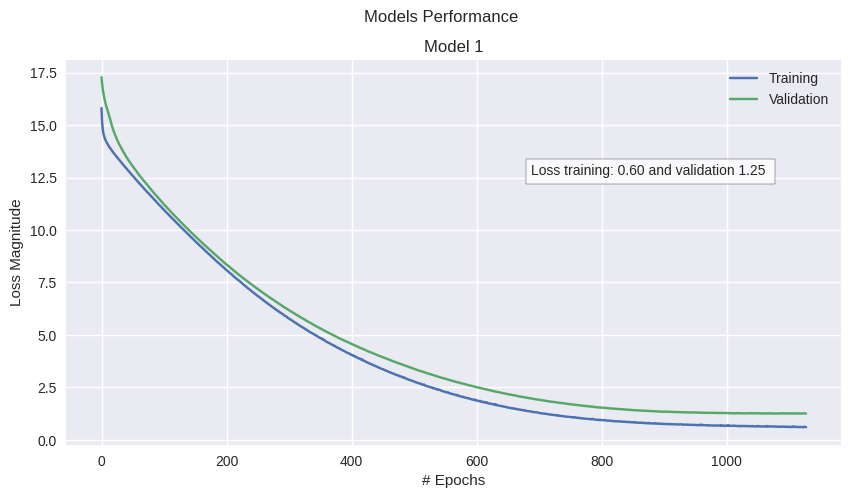

1/1 [==============================] - 0s 45ms/step
Training done (Time taken: 30.37 seconds)
Now creating and training the model
Fold 1/8
Training on: [1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963
 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977
 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991
 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019]
Testing on: [1940 1941 1942 1943 1944 1945 1946 1947 1948 1949]
1/1 [==============================] - 0s 43ms/step
Fold 2/8
Training on: [1940 1941 1942 1943 1944 1945 1946 1947 1948 1949 1960 1961 1962 1963
 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977
 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991
 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019

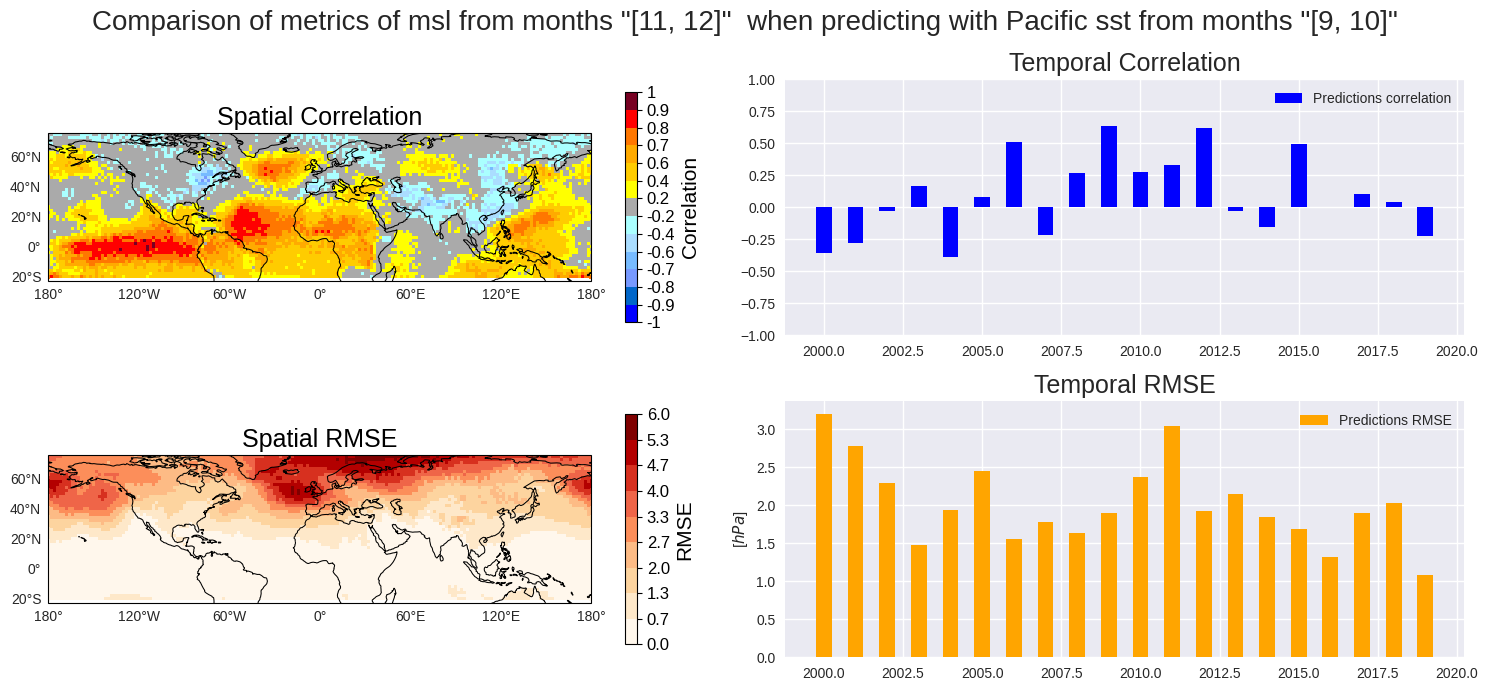

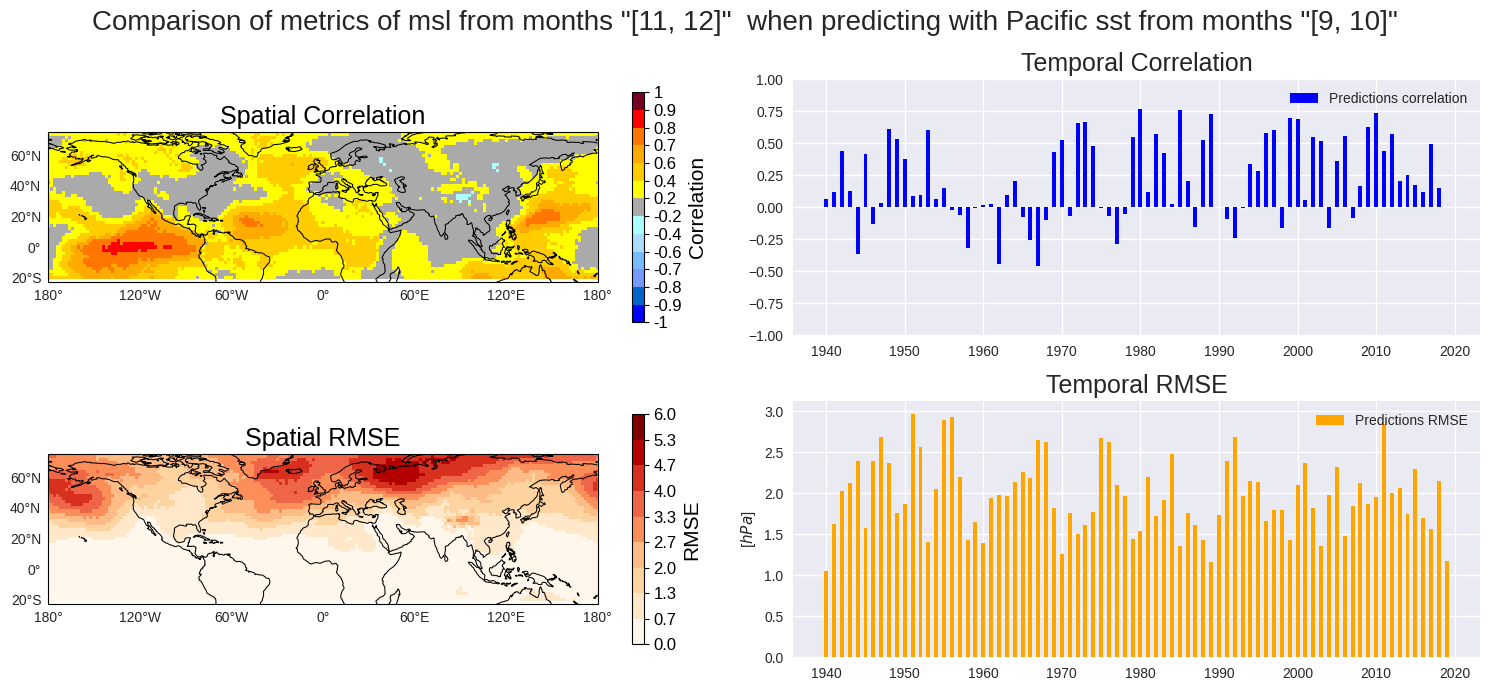

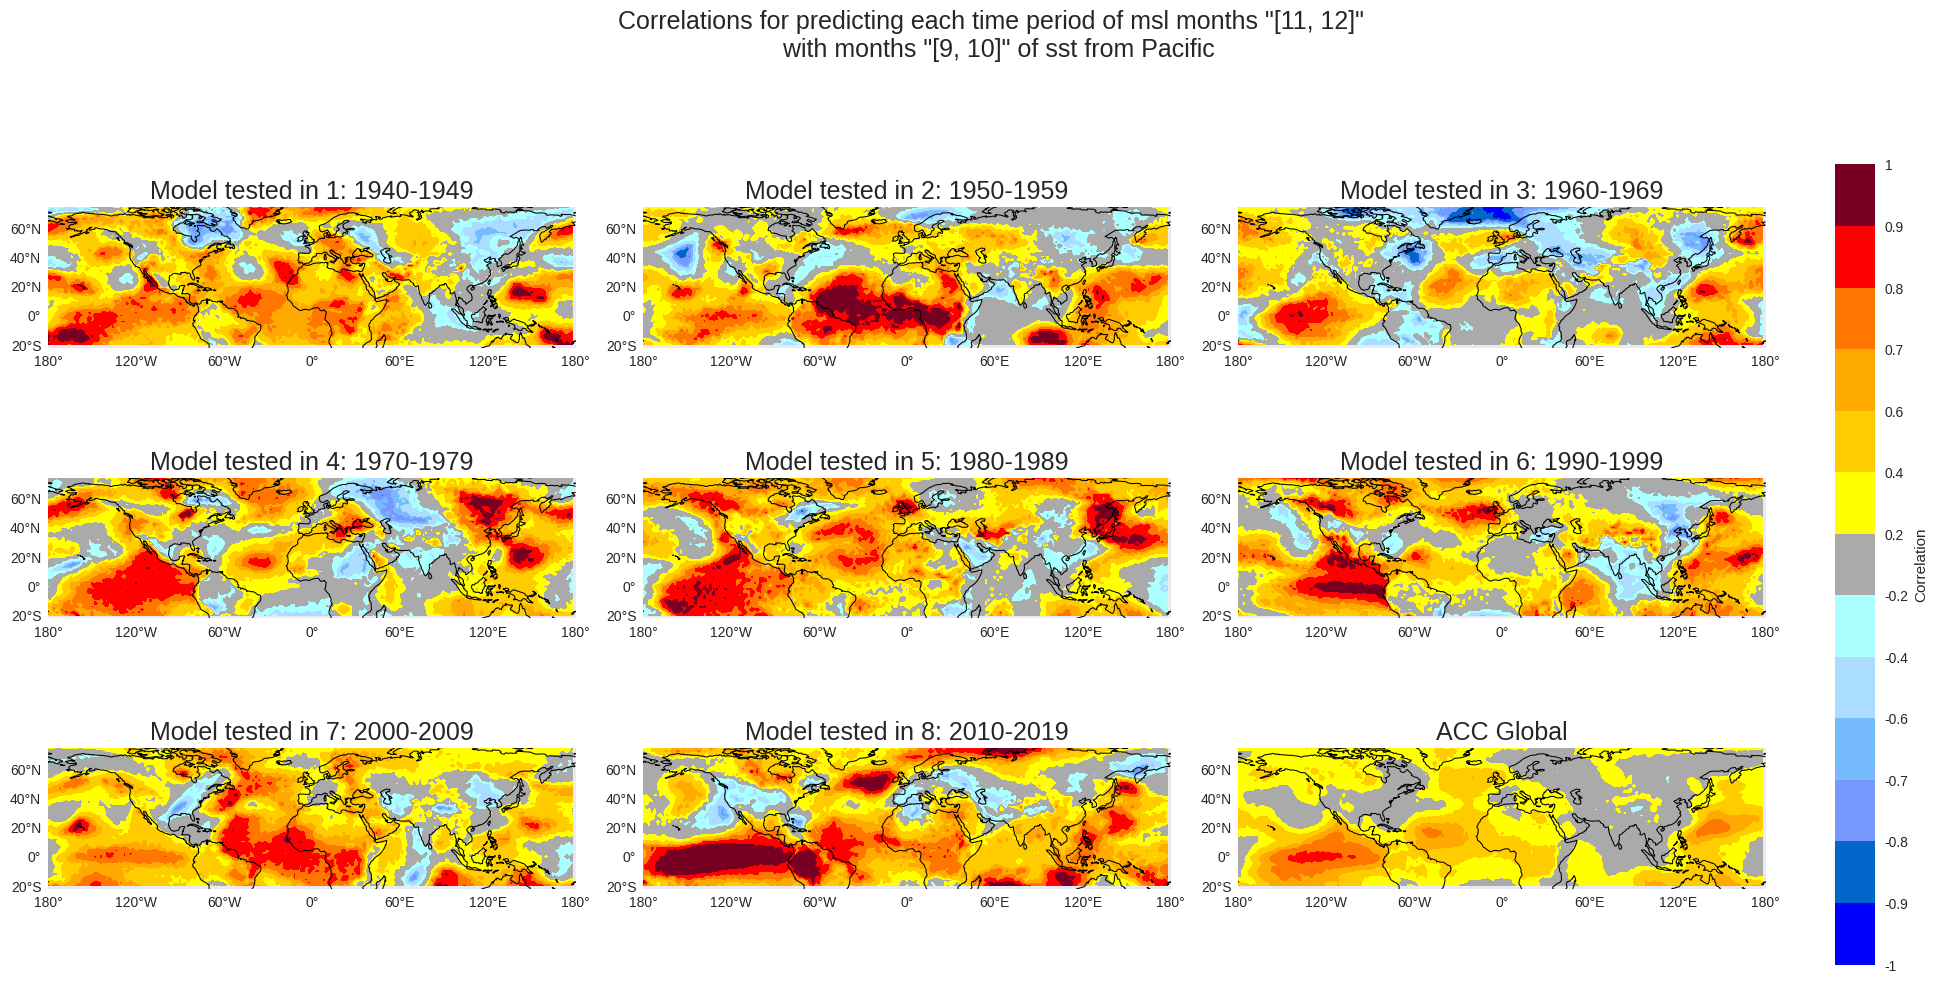

In [11]:
dictionary_preprocess= Preprocess(dictionary_hyperparams= hyperparameters)
predicted_value,observed_value= Model_build_and_test(dictionary_hyperparams= hyperparameters, dictionary_preprocess= dictionary_preprocess, cross_validation=False, n_cv_folds=0)
predicted_global,observed_global= Model_build_and_test(dictionary_hyperparams= hyperparameters, dictionary_preprocess= dictionary_preprocess, cross_validation=True, n_cv_folds=8, plot_differences=False)

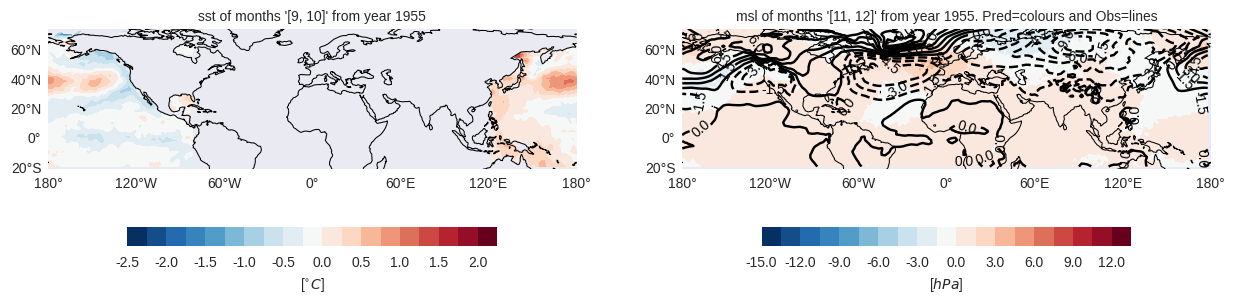

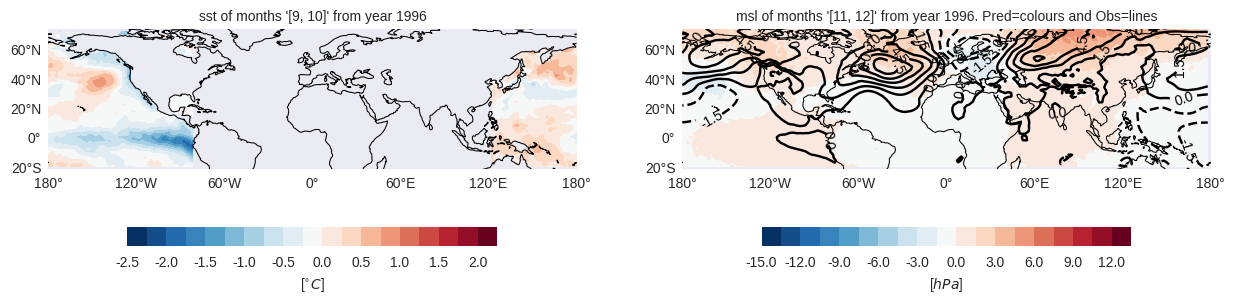

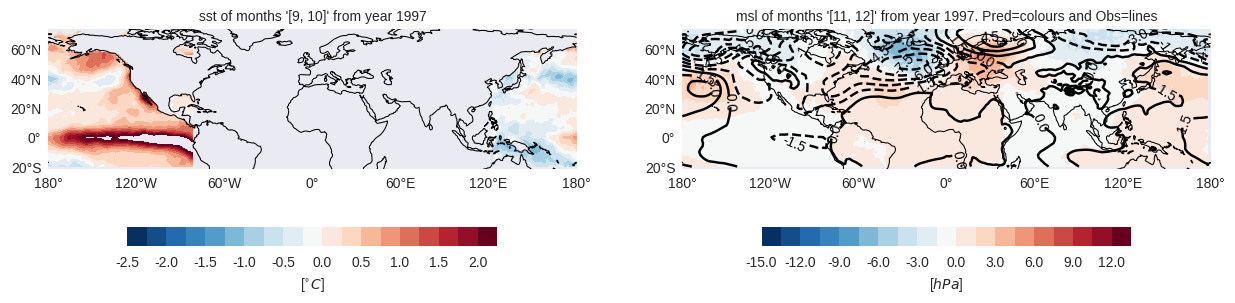

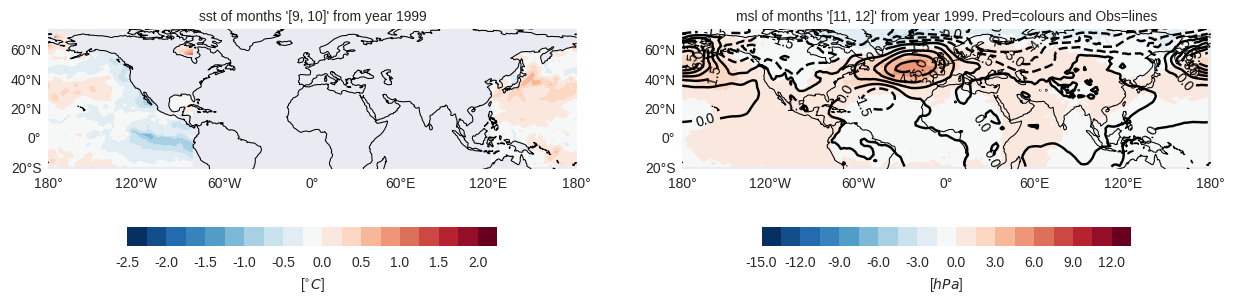

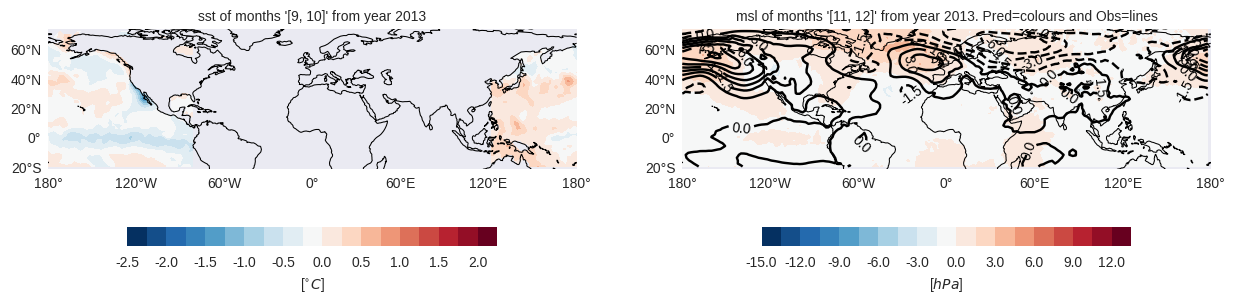

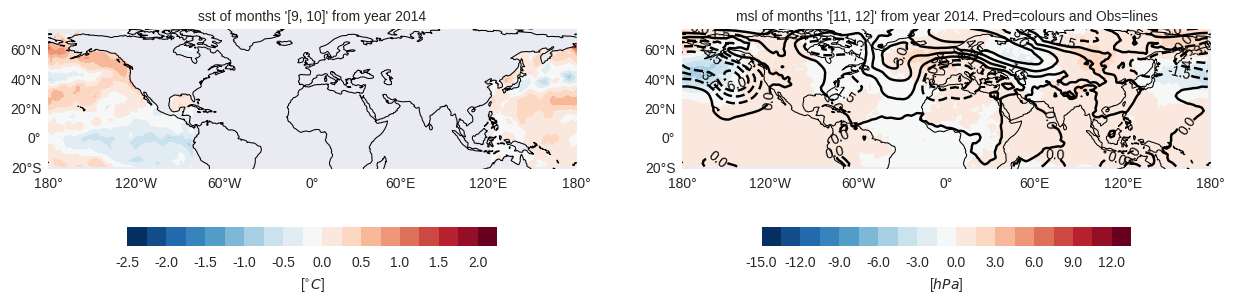

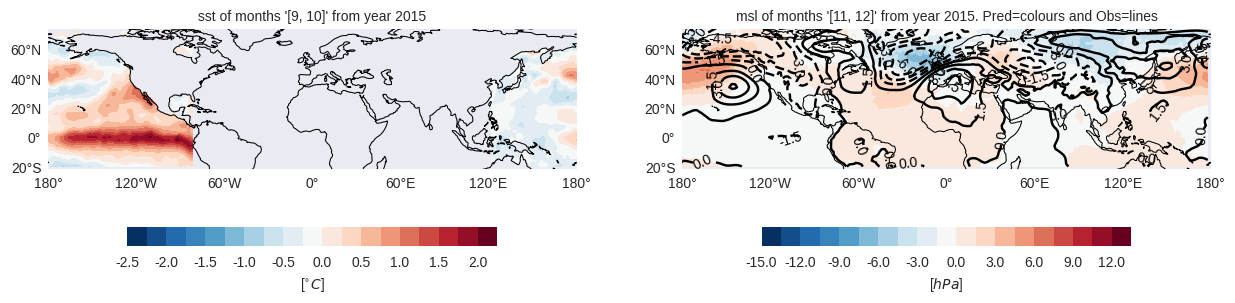

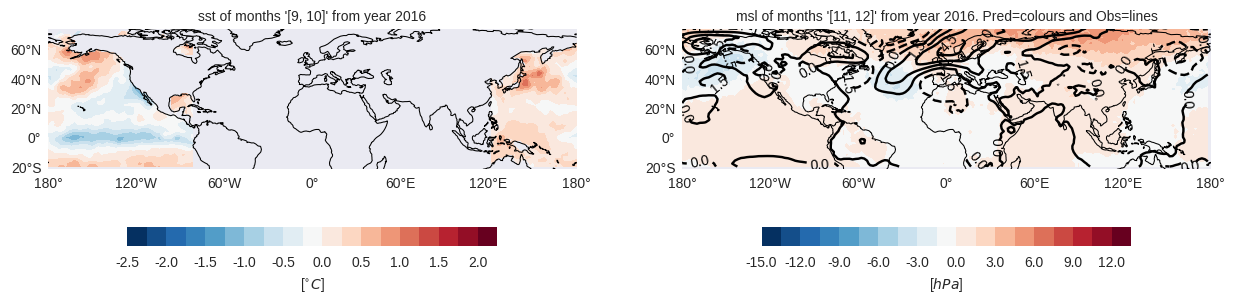

In [13]:
Results_plotter(hyperparameters, dictionary_preprocess, rang_x=2.5, rang_y=15, predictions=predicted_global, observations=observed_global, years_to_plot=[1955,1996,1997,1999,2013,2014,2015,2016], plot_with_contours=True)

Explained variance ratio: [0.52129699 0.25172651 0.11109644 0.05670355]
Explained variance ratio: [0.45603686 0.2139899  0.10540257 0.0733125 ]


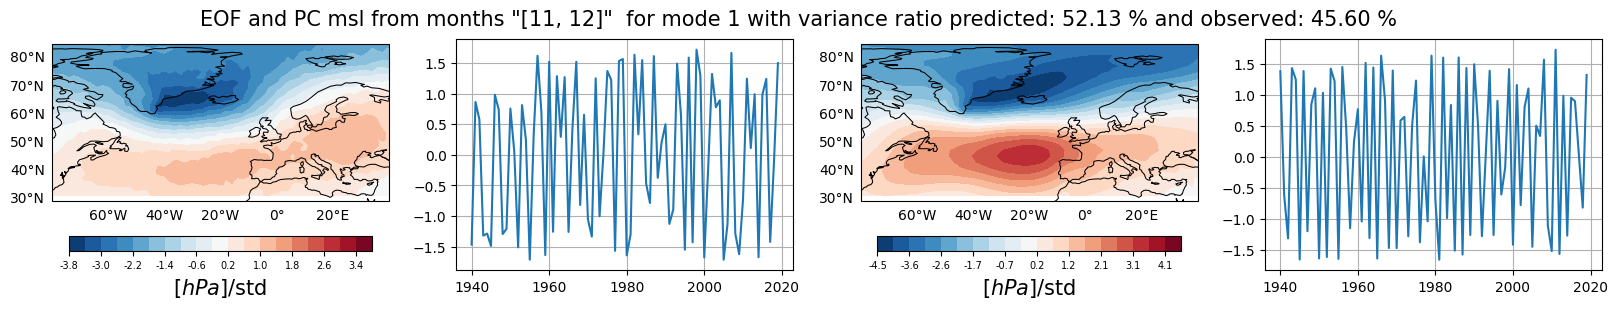

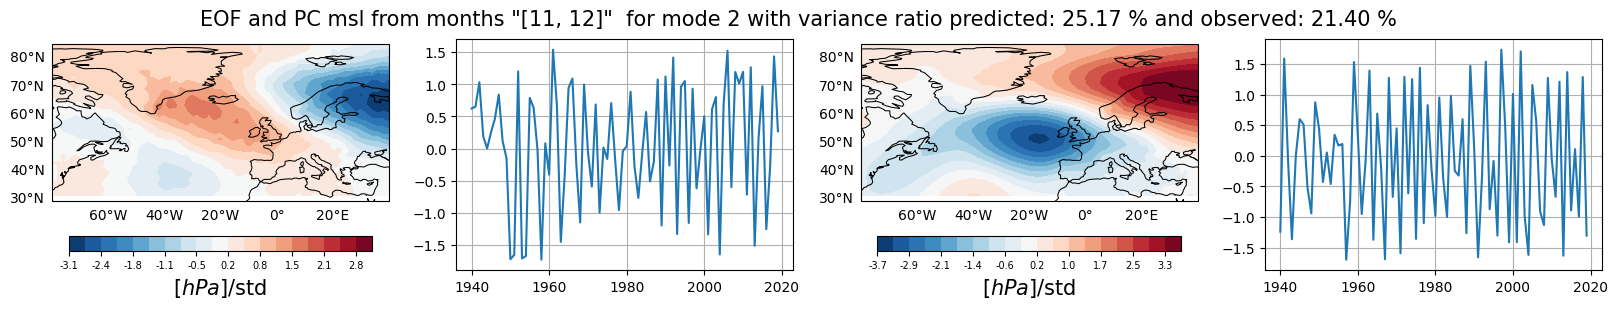

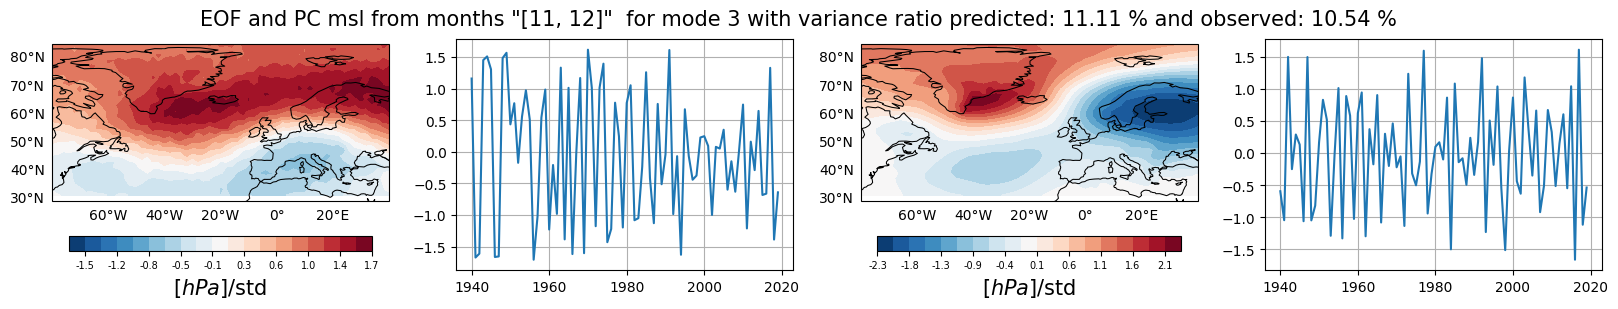

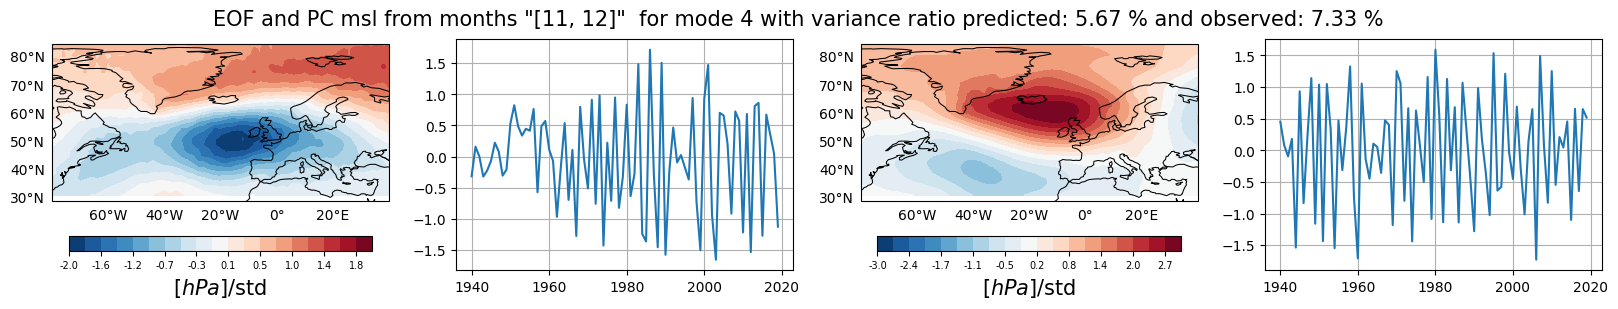

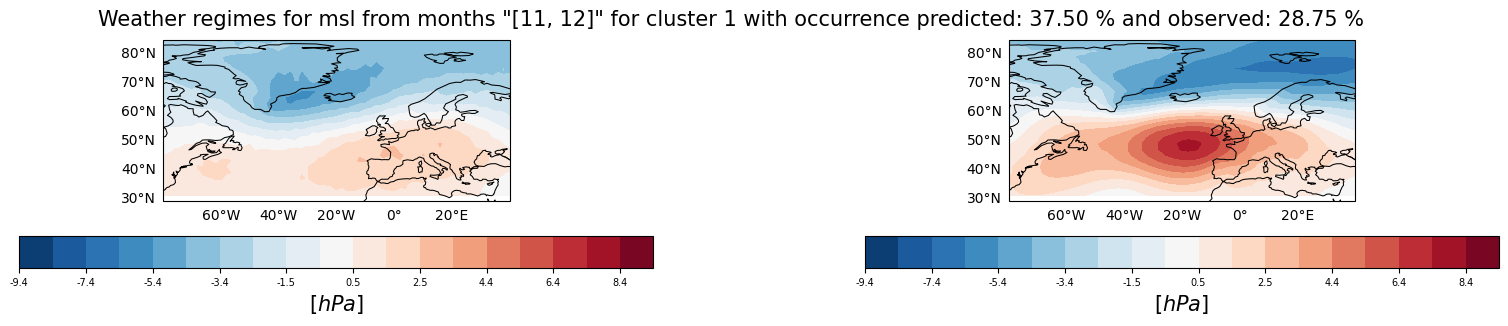

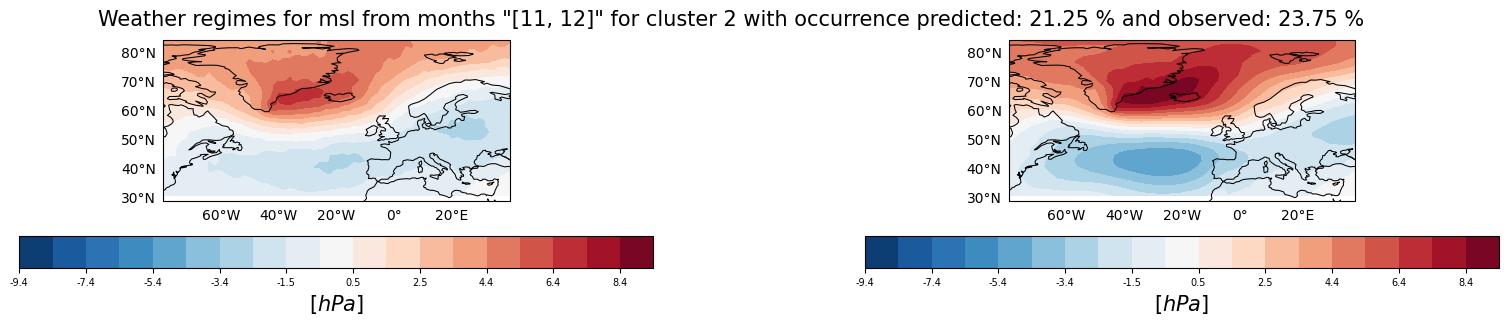

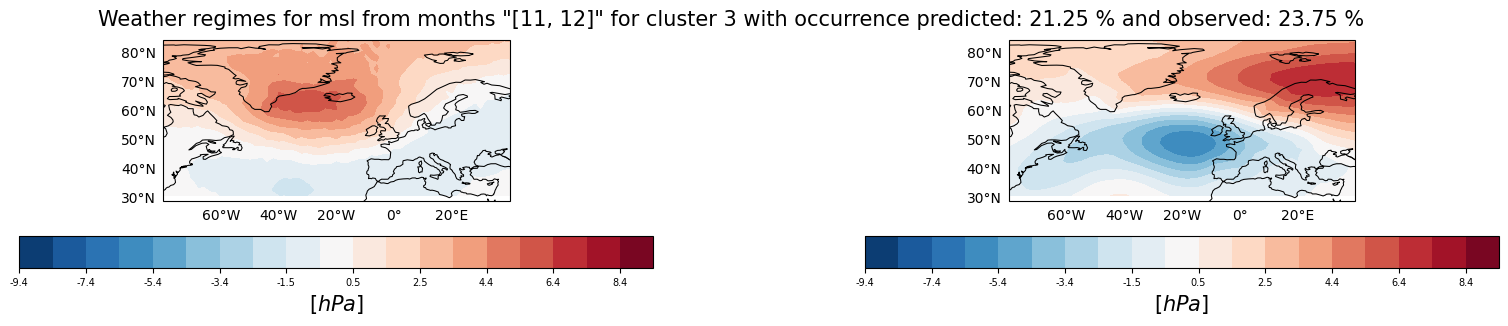

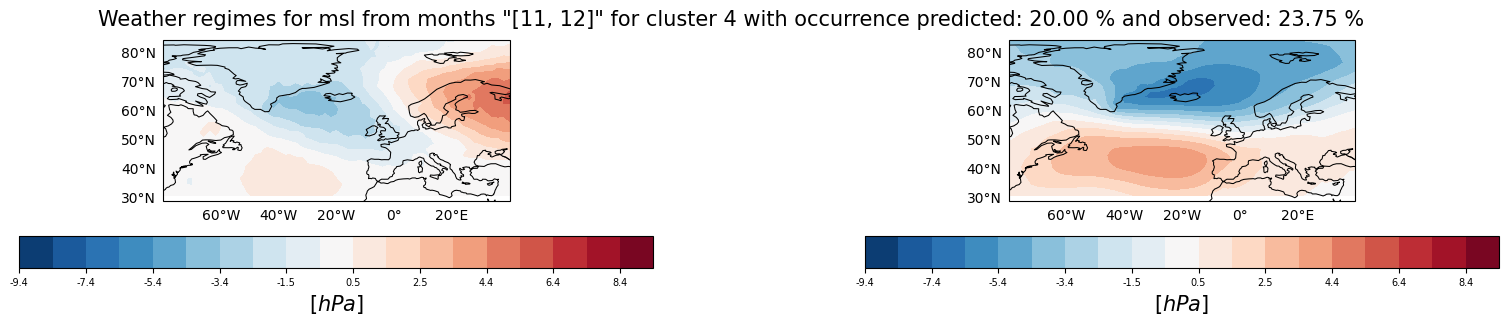

In [15]:
pcs_pred, eofs_pred, pcs_obs, eofs_obs, cluster_pred, cluster_obs= PC_analysis(hyperparameters, predicted_global, observed_global, n_modes=4, n_clusters=4, cmap='RdBu_r', save_plots=True)

In [2]:
params_selection = {
    'pos_number_layers': 3,  # set the maximum value of fully connected layers
    'pos_layer_sizes': [16, 64, 256],  # set the possible layer sizes
    'pos_activations': ["elu", "linear", "relu"],  # set the possible activation functions (possibilities are all the ones available in tensorflow: tf.keras.layers.activations())
    'pos_dropout': [0.0, 0.01],  # set the possible dropout rates
    'pos_kernel_regularizer': ["l1_l2", "None", "l1", "l2"],  # set the possible kernel regularizer (possibilities are: l1_l2, l1, l2, None)
    'search_skip_connections': False,  # set if searching for skip connections (either intermediate or end_to_end)
    'pos_conv_layers': 0,  # set the maximum number of convolutional layers, the entry data must be 2D
    'pos_learning_rate':  [1e-4,1e-3]} # set the possible learning rates

fig4,fig5,fig6, predicted_global_bm, observed_global_bm= Model_searcher(dictionary_hyperparams= hyperparameters, dictionary_preprocess=dictionary_preprocess, dictionary_possibilities= params_selection, max_trials=30, n_cv_folds=7)


NameError: name 'Model_searcher' is not defined